<a href="https://colab.research.google.com/github/ashishmission93/Ashish-Autonomous-Vehicles-and-Drones-Projects/blob/main/problem_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

=== Structural Integrity Analysis ===

Material: Carbon_fiber
Stress Applied: 11090.37 Pa
Safety Margin: 5.41%


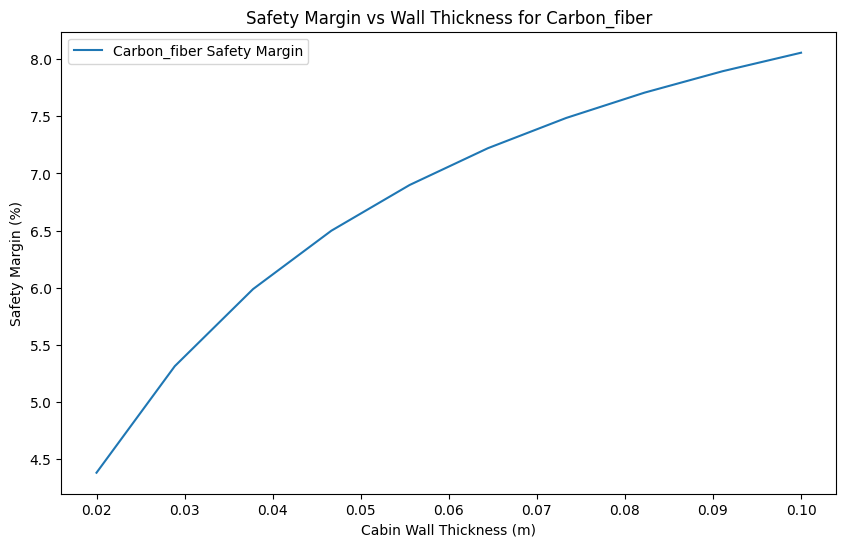


Material: Aluminum
Stress Applied: 15136.99 Pa
Safety Margin: 1.32%


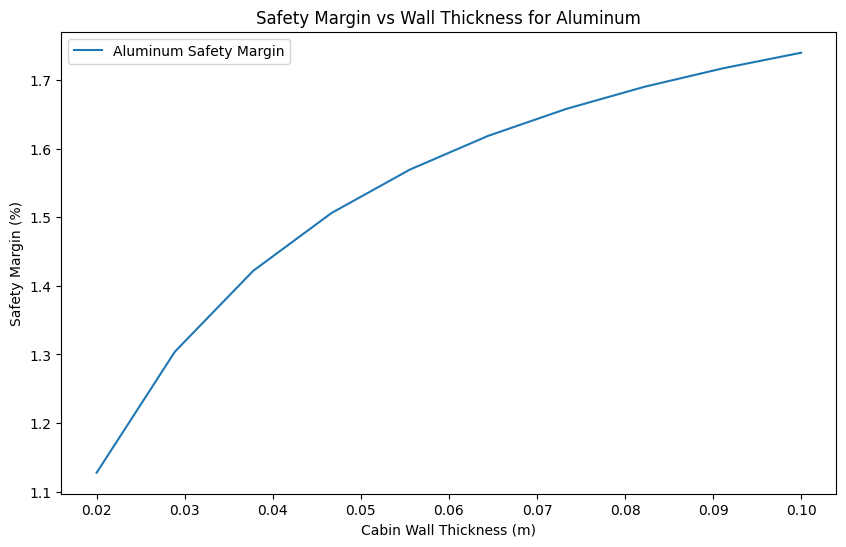


Material: Titanium
Stress Applied: 21758.74 Pa
Safety Margin: 1.53%


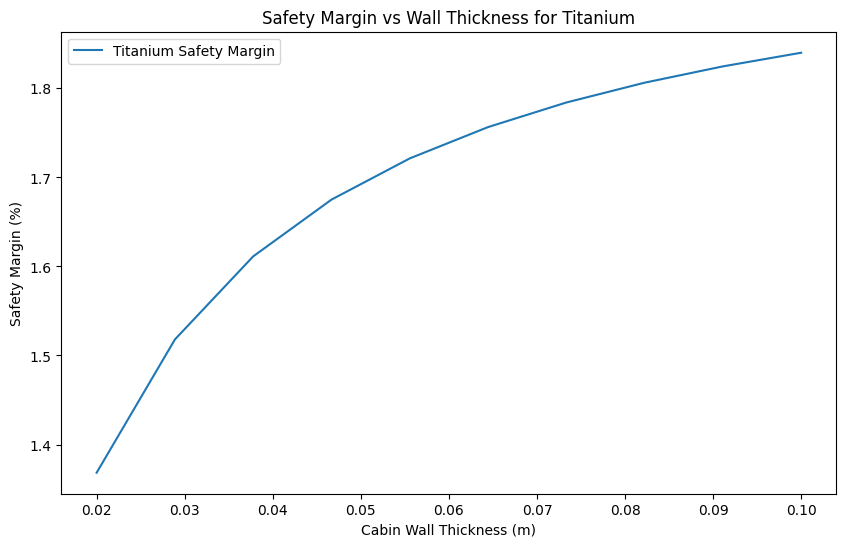


Material: Glass_fiber
Stress Applied: 14401.24 Pa
Safety Margin: 0.93%


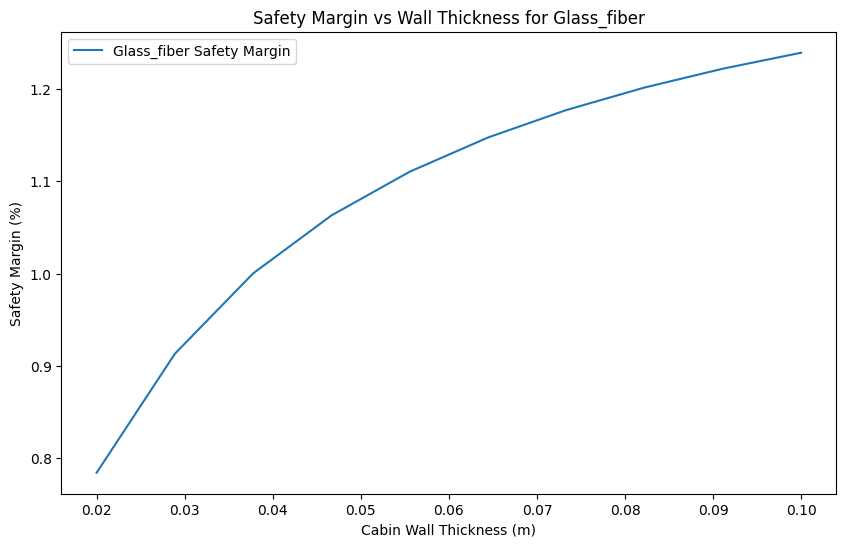


=== Comfort and Environmental Controls ===
Air Change Time: 4.00 seconds
Temperature Control Range: 21.80°C - 22.20°C

=== Optimized Cabin Designs ===
Optimal Cabin Designs for Single Passenger Drone:
Empty DataFrame
Columns: []
Index: []


In [ ]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Constants for Material Properties and Safety Factors
materials = {
    "carbon_fiber": {"density": 1.6, "strength": 900, "cost": 100},
    "aluminum": {"density": 2.7, "strength": 300, "cost": 50},
    "titanium": {"density": 4.5, "strength": 500, "cost": 200},
    "glass_fiber": {"density": 2.5, "strength": 200, "cost": 20}
}
safety_factor = 1.5

# Passenger weight and volume constraints (assumed values)
passenger_weight = 75  # kg
passenger_height = 1.8  # meters
cabin_volume_constraint = 2  # cubic meters (estimated for a single passenger)

# Calculate Cabin Wall Thickness and Dimensions
cabin_diameter = 1.5  # meters, diameter of circular cabin
cabin_wall_thickness = 0.03  # meters, arbitrary thickness

# Function to calculate cabin weight based on material and dimensions
def calculate_cabin_weight(material, diameter, thickness):
    density = materials[material]["density"]
    radius = diameter / 2
    volume = np.pi * (radius ** 2) * thickness  # cylinder surface area
    return density * volume * 1000  # convert to kg

# Structural Integrity Analysis
def structural_integrity(material, diameter, thickness):
    strength = materials[material]["strength"]
    applied_force = (passenger_weight + calculate_cabin_weight(material, diameter, thickness)) * 9.81
    area = np.pi * diameter * thickness
    stress = applied_force / area
    safety_margin = (strength / (stress * safety_factor)) * 100
    return {"stress": stress, "safety_margin": safety_margin}

# Comfort Analysis: Airflow and Temperature Control
def cabin_airflow_simulation(volume):
    airflow_rate = 0.5  # cubic meters per second, arbitrary
    air_change_time = volume / airflow_rate
    return air_change_time

def temperature_control_simulation(external_temp, passenger_count=1):
    cabin_temp = 22  # degrees Celsius
    heat_generated = passenger_count * 100  # W, arbitrary human heat output
    temp_change = (heat_generated / 1000) * 2  # approx. 2 degrees per kW
    return cabin_temp + temp_change, cabin_temp - temp_change

# Optimize Cabin Design with Constraints
def optimize_design():
    optimal_designs = []
    for material in materials:
        for thickness in np.linspace(0.02, 0.1, 5):
            weight = calculate_cabin_weight(material, cabin_diameter, thickness)
            integrity = structural_integrity(material, cabin_diameter, thickness)
            if integrity["safety_margin"] > 100 and weight < 200:
                optimal_designs.append({
                    "material": material,
                    "thickness": thickness,
                    "weight": weight,
                    "safety_margin": integrity["safety_margin"]
                })
    return optimal_designs

# Display Results of Optimization
def display_optimal_designs():
    designs = optimize_design()
    df = pd.DataFrame(designs)
    print("Optimal Cabin Designs for Single Passenger Drone:")
    print(df)

# Visualization of Structural Integrity Analysis
def plot_safety_margin(material):
    thickness_range = np.linspace(0.02, 0.1, 10)
    safety_margins = [structural_integrity(material, cabin_diameter, t)["safety_margin"] for t in thickness_range]

    plt.figure(figsize=(10, 6))
    plt.plot(thickness_range, safety_margins, label=f"{material.capitalize()} Safety Margin")
    plt.xlabel("Cabin Wall Thickness (m)")
    plt.ylabel("Safety Margin (%)")
    plt.title(f"Safety Margin vs Wall Thickness for {material.capitalize()}")
    plt.legend()
    plt.show()

# Running All Analyses and Simulations
if __name__ == "__main__":
    # Structural Integrity Analysis for Each Material
    print("=== Structural Integrity Analysis ===")
    for material in materials:
        print(f"\nMaterial: {material.capitalize()}")
        integrity = structural_integrity(material, cabin_diameter, cabin_wall_thickness)
        print(f"Stress Applied: {integrity['stress']:.2f} Pa")
        print(f"Safety Margin: {integrity['safety_margin']:.2f}%")
        plot_safety_margin(material)

    # Airflow and Temperature Control
    print("\n=== Comfort and Environmental Controls ===")
    air_change_time = cabin_airflow_simulation(cabin_volume_constraint)
    print(f"Air Change Time: {air_change_time:.2f} seconds")

    external_temp = 30  # degrees Celsius
    cabin_temp_high, cabin_temp_low = temperature_control_simulation(external_temp)
    print(f"Temperature Control Range: {cabin_temp_low:.2f}°C - {cabin_temp_high:.2f}°C")

    # Display Optimized Designs
    print("\n=== Optimized Cabin Designs ===")
    display_optimal_designs()
